In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int 
    operation1: str
    number2: int 
    operation2: str
    number3: int
    number4: int
    finalNumber1: int
    finalNumber2: int

In [4]:
def adder1(state: AgentState) -> AgentState:
    """ This node add the 2 numbers """
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    """ This node add the 2 numbers """
    state["finalNumber2"] = state['number3'] + state['number4']
    return state


def subtracor1(state: AgentState) -> AgentState:
    """ This node subtracts the 2 numbers """
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def subtracor2(state: AgentState) -> AgentState:
    """ This node subtracts the 2 numbers """
    state['finalNumber2'] = state['number3'] - state['number4']
    return state


def decide_next_node(state: AgentState) -> AgentState:
    """ This node will select the next node of th graph """
    if state['operation1'] == "+":
       return "addition_operation1"
    
    elif state['operation1'] == "-":
        return "subtract_operation1"
    
def decide_next_node2(state: AgentState) -> AgentState:
    """ This node will select the next node of th graph """
    if state['operation2'] == "+":
       return "addition_operation2"
    
    elif state['operation2'] == "-":
        return "subtract_operation2"
    

    

In [7]:
graph = StateGraph(AgentState)
graph.add_node("add_node1",adder1)
graph.add_node("add_node2",adder2)
graph.add_node("subtract_node1",subtracor1)
graph.add_node("subtract_node2",subtracor2)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START , "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        "addition_operation1":"add_node1",
        "subtract_operation1":"subtract_node1"
    }
)

graph.add_edge("add_node1","router2")
graph.add_edge("subtract_node1","router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
     {
        "addition_operation2":"add_node2",
        "subtract_operation2":"subtract_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)

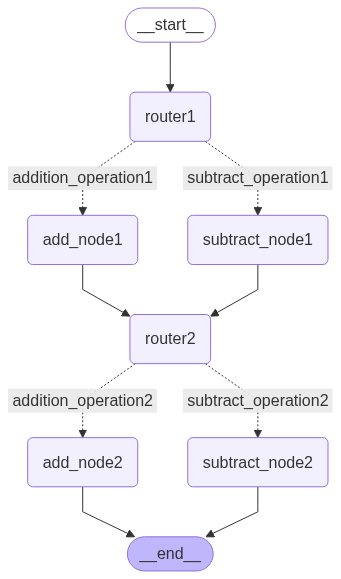

In [8]:
app  = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))



In [9]:
initial_state_1 = AgentState(number1=23,number2=11, number3=11,number4=12, operation1= "+",operation2="-")
print(app.invoke(initial_state_1))

{'number1': 23, 'operation1': '+', 'number2': 11, 'operation2': '-', 'number3': 11, 'number4': 12, 'finalNumber1': 34, 'finalNumber2': -1}
